**Customer Churn Prediction(Telcom Industry)**

*Problem statement:*
Customer churn is when subscibers stop using services being provided by a firm. When customers leave, the firm loses revenue and are required to spend additional resources to attract new customers. Predicting churn before it happens becomes a vital thing for a company which helps them take action early.
The goal of the project is to build a machine learning mdel that can predict whether a customer is at a high risk of churn.
*Importance*
-To reduce loss of revenue
-Deploy resources targeted at customer retention srategies.
-The business is able to understand which services influence churn.

The dataset used in this project was downloaded from kaggle.com which contained information of about 7043 customers. Each column provided details about what the customer has subscribed, demographics, billing information and whether they churned or not.




**Load the data** 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
churn_data=pd.read_csv('Customer Churn Prediction (Telecom Industry) csv.csv')
churn_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
churn_data.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
#separate numerical and categorical variables

churn_numeric_cols=churn_data.select_dtypes(include=['int64','float64']).columns
churn_categorical_cols=churn_data.select_dtypes(include=['object']).columns
print('Numerical columns:', churn_numeric_cols)
print('Categorical columns:',churn_categorical_cols)


Numerical columns: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')
Categorical columns: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [11]:
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')

In [12]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
#any missing data
churn_data.isnull().any().any()



np.True_

In [14]:
#check missing values per column
churn_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#which rows are contributing to missing values
churn_data[churn_data.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


The total charges are zero when the tenure is zero which could indicate new subscribers. To deal with the missing values, we input zero in the total monthly charges to help even with modelling at later stages.

In [16]:
#impute missing values with zero
churn_data['TotalCharges'] = churn_data['TotalCharges'].fillna(0)

In [ ]:
#confirm no missing values
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
churn_data.shape

(7043, 21)

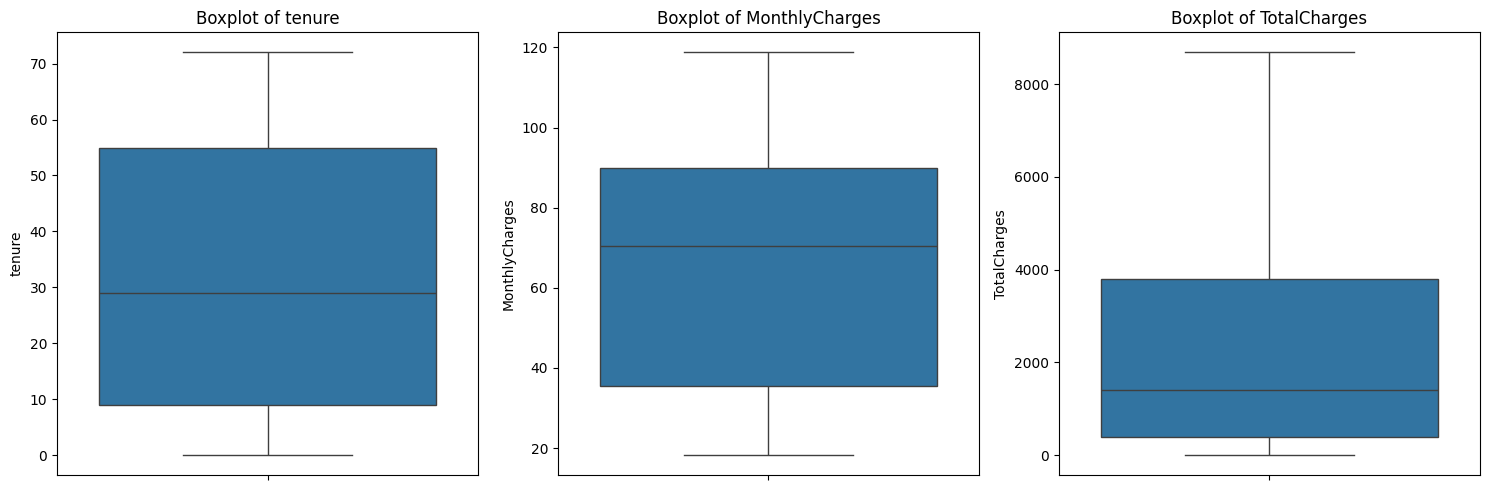

In [19]:
#outliers
import seaborn as sns
import matplotlib.pyplot as plt

churn_numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 5))

for i, col in enumerate(churn_numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=churn_data, y=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


Tenure exhibits no outliers as the distribution is fairly uniform. Monthly charges and total charges indicate mild outliers which could mean that there are some customers with long term subscriptions. 

**Exploratory Data Analysis**

1. Churn and not churn distribution - 26.5% of customers switched to another firm. This also shows about 73.5% of customers remain with the company , showing healthy retenstion

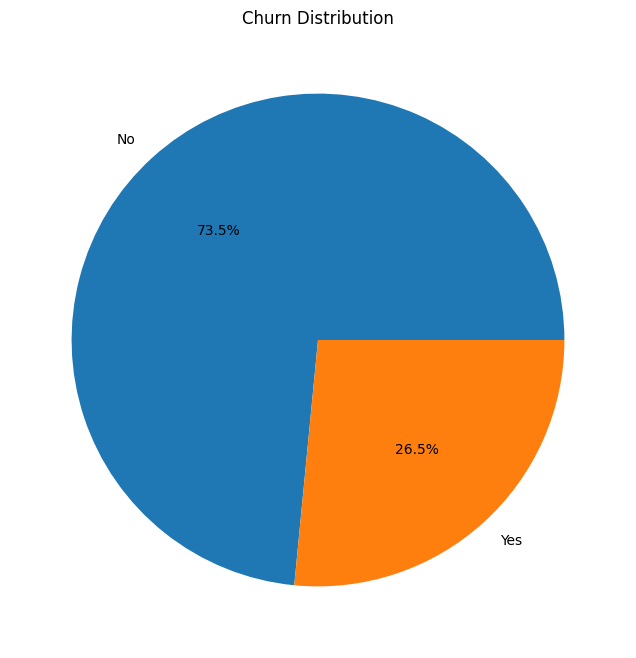

In [ ]:
import matplotlib.pyplot as plt
churn_counts =churn_data['Churn'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(churn_counts,labels=churn_counts.index,autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.show()



2. Churn distribution with respect to gender - Analysis of churn with respect to  gender shows there is negligible difference of churn rates between male and female. This means that gender is not a strong predictor of churn behaviour. Gender distribution seems balanced and healthy customer retention is evident.

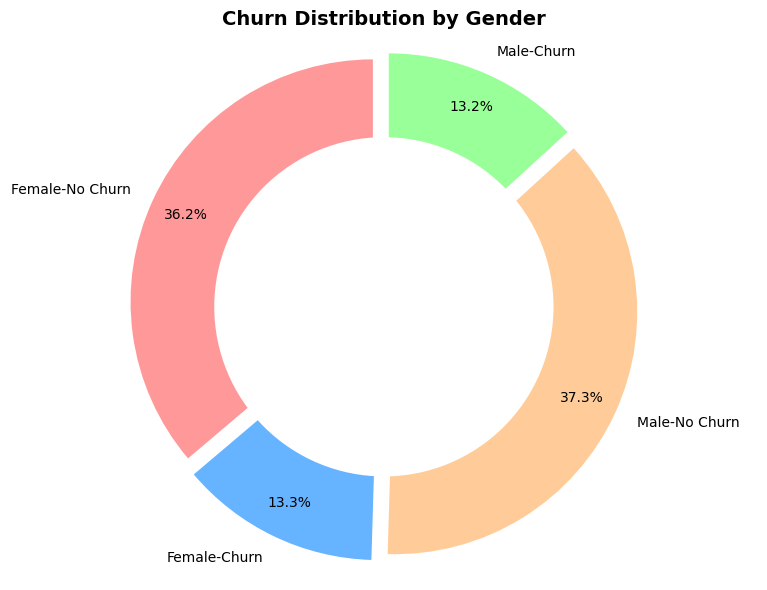

In [21]:

import matplotlib.pyplot as plt
churn_by_gender=churn_data.groupby(['gender','Churn']).size().unstack(fill_value=0)
values=churn_by_gender.values.flatten()
labels=['Female-No Churn','Female-Churn','Male-No Churn','Male-Churn']
colors=['#ff9999', '#66b3ff', '#ffcc99', '#99ff99']
fig,ax=plt.subplots(figsize=(8,6))
wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    pctdistance=0.85,
    explode=[0.05]*4
)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)
ax.axis('equal')
plt.title('Churn Distribution by Gender', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


3. Customer churn by contract type - customers with month-to-month subscription have the highest churn compared to one and two year countries. This could be that for month to month users, they are testing the product and most likely comparing with other providers. 
Contract length is a key predictor of churn and retention methods should be prioritized on the month-to-month users.

<Axes: xlabel='Contract', ylabel='count'>

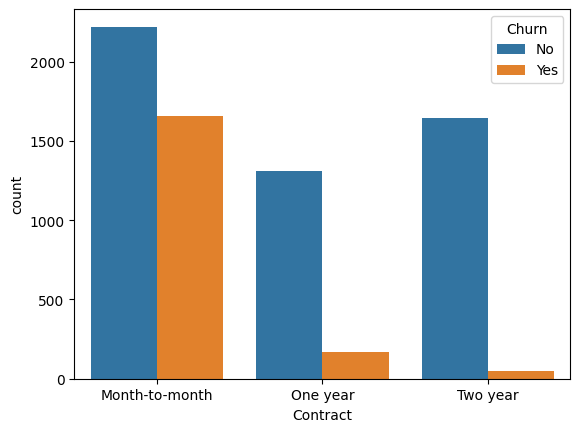

In [22]:
#churn by contract type
sns.countplot(data=churn_data, x='Contract', hue='Churn')

4. Internet services vs churn - Customers using fiber optics churn the most but they also have the largest customer base. This could indicate that customers are not happy with the internet services. Customers using DSL churn less than the fiber optic which indicates more satisfaction with the service

<Figure size 640x480 with 0 Axes>

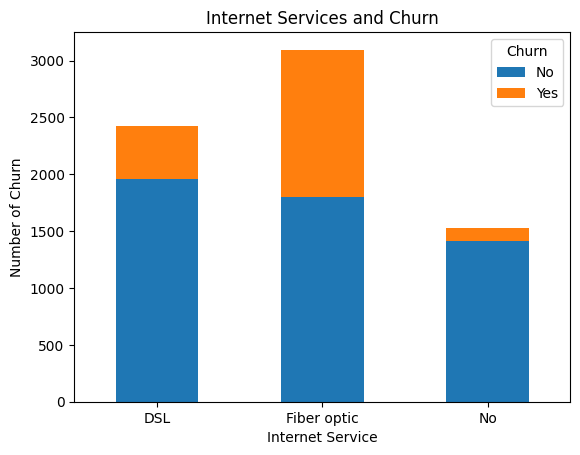

In [24]:
import pandas as  pd
import matplotlib.pyplot as plt
import numpy as np

ct = pd.crosstab(churn_data["InternetService"], churn_data["Churn"])
plt.figure()
ct.plot(kind='bar',stacked=True)
plt.title('Internet Services and Churn')
plt.xlabel('Internet Service')
plt.ylabel('Number of Churn')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.show()


5. Payment method vs churn -The barchart shows that the Electronic check customers churn the most while automatic pay churn the least. This group should be targeted when it comes to retention strategies.

<Figure size 1000x600 with 0 Axes>

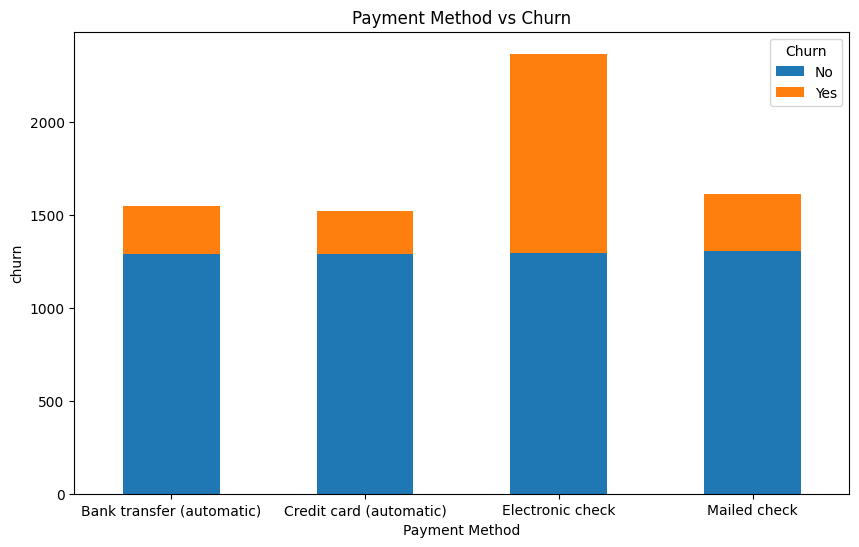

In [25]:
import pandas as  pd
import matplotlib.pyplot as plt
import numpy as np
ct=pd.crosstab(churn_data['PaymentMethod'],churn_data['Churn'])
plt.figure(figsize=(10,6))
ct.plot(kind='bar',stacked=True,figsize=(10,6))
plt.title("Payment Method vs Churn")
plt.xlabel('Payment Method')
plt.ylabel('churn')
plt.xticks(rotation=0)
plt.show()


6. Tech suppport vs churn - Customers with no TechSupport churn the most. They move to another provider where they feel supported.In contrast, customers with TechSupport showed a significantly lower churn rate. Availability of technical support play a big role in cusomer retention


<Figure size 640x480 with 0 Axes>

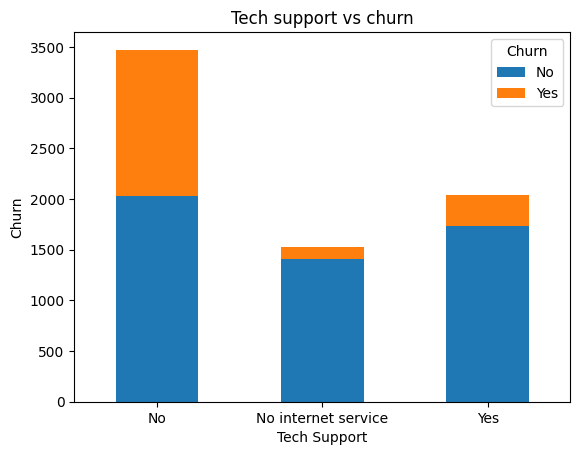

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ct=pd.crosstab(churn_data['TechSupport'], churn_data['Churn'])
plt.figure()
ct.plot(kind='bar',stacked=True)
plt.title('Tech support vs churn')
plt.xlabel('Tech Support')
plt.ylabel('Churn')
plt.xticks(rotation=0)
plt.show()


7. Online Security vs churn- Customers with no online security churn the most.

<Figure size 640x480 with 0 Axes>

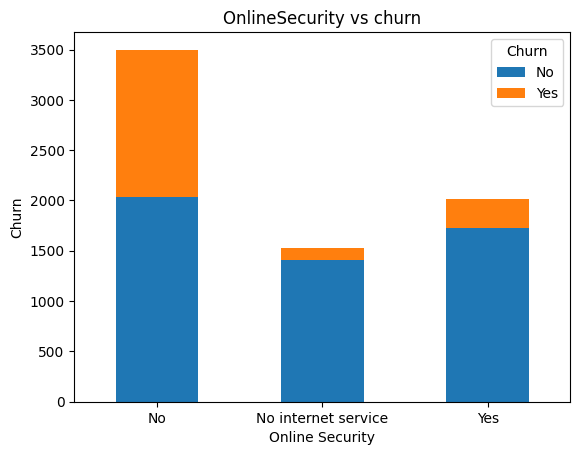

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ct=pd.crosstab(churn_data['OnlineSecurity'], churn_data['Churn'])
plt.figure()
ct.plot(kind='bar',stacked=True)
plt.title('OnlineSecurity vs churn')
plt.xlabel('Online Security')
plt.ylabel('Churn')
plt.xticks(rotation=0)
plt.show()

8. Paperless billing vs churn - Paperless billing is associated with higher churn risk which makes it a meaningful predictor of churn.

<Figure size 1000x600 with 0 Axes>

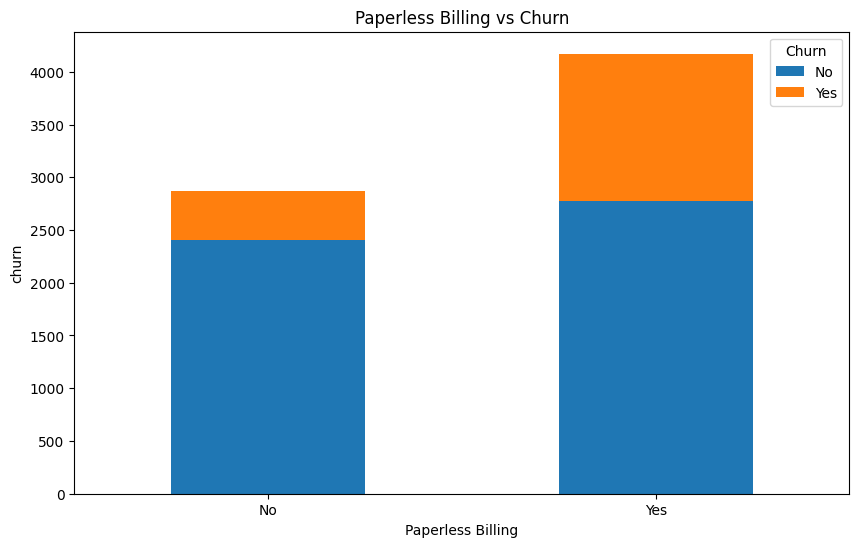

In [28]:
import pandas as  pd
import matplotlib.pyplot as plt
import numpy as np
ct=pd.crosstab(churn_data['PaperlessBilling'],churn_data['Churn'])
plt.figure(figsize=(10,6))
ct.plot(kind='bar',stacked=True,figsize=(10,6))
plt.title("Paperless Billing vs Churn")
plt.xlabel('Paperless Billing')
plt.ylabel('churn')
plt.xticks(rotation=0)
plt.show()

9. tenure vs churn-customers that churn more are those with  short tenures(months)

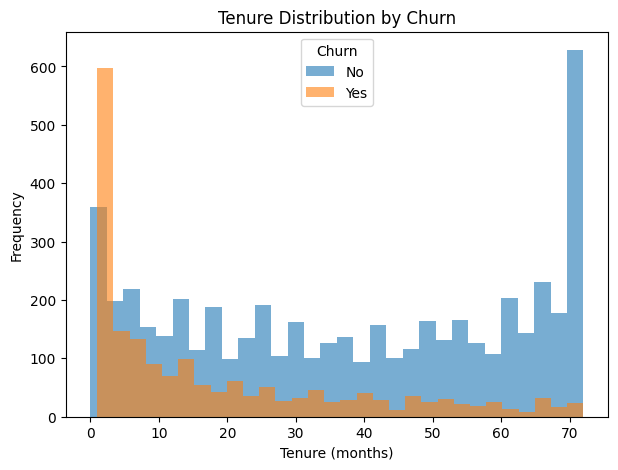

In [29]:
#Tenure vs churn
plt.figure(figsize=(7,5))
for label in churn_data['Churn'].unique():
    plt.hist(churn_data[churn_data['Churn']==label]['tenure'], bins=30, alpha=0.6, label=label)

plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (months)")
plt.ylabel("Frequency")
plt.legend(title="Churn")
plt.show()

10. Monthly charges vs churn - customers that leave pay more monthly charges compared to those who stay. The median monthly charge for churn customers is about $80 while for those who stay its about $65

<Figure size 600x500 with 0 Axes>

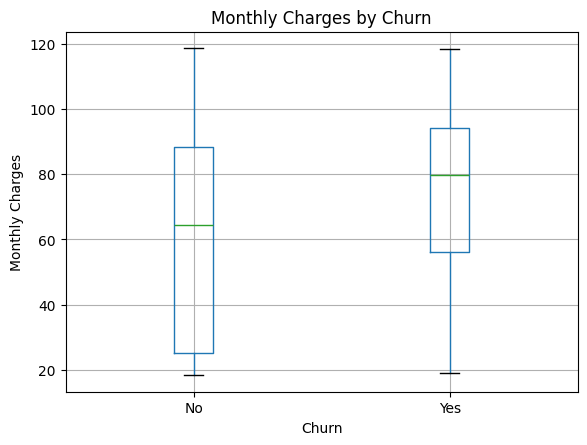

In [30]:
#monthly charges vs churn
plt.figure(figsize=(6,5))
churn_data.boxplot(column='MonthlyCharges', by='Churn')
plt.title("Monthly Charges by Churn")
plt.suptitle("")  # remove automatic title
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

11. Total charges vs churn - The distribution is right skewed which means that most customers have low total charges and few customers have high total charges.

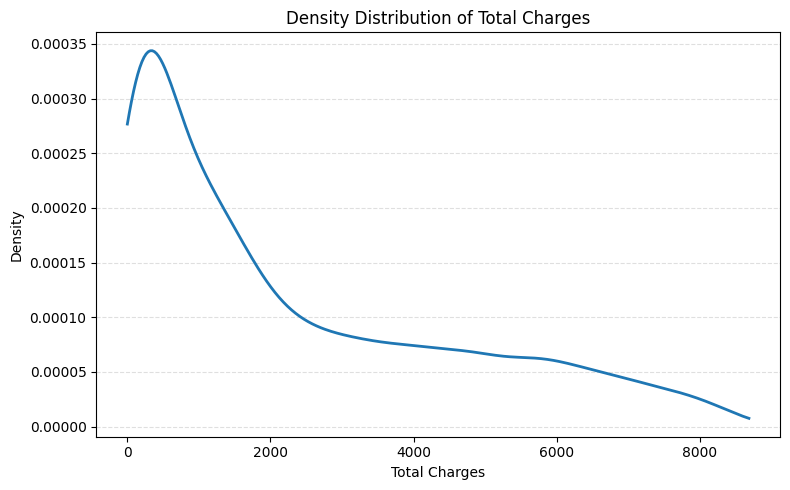

In [31]:
#total charges vs churn
from scipy.stats import gaussian_kde
churn_data["TotalCharges"] = pd.to_numeric(churn_data["TotalCharges"], errors="coerce")
data = churn_data["TotalCharges"].dropna()
data= data.values.astype(float)
density = gaussian_kde(data)
xs = np.linspace(min(data), max(data), 300)
plt.figure(figsize=(8,5))
plt.plot(xs, density(xs), linewidth=2)
plt.title("Density Distribution of Total Charges")
plt.xlabel("Total Charges")
plt.ylabel("Density")
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()

**Feature engineering and selection**

In [32]:
#new group= Spending_Rate
churn_data['Spending_Rate']=churn_data['TotalCharges']/churn_data['tenure']
churn_data['Spending_Rate'].describe()
churn_data[['TotalCharges','tenure','MonthlyCharges','Spending_Rate']].head(5)

,TotalCharges,tenure,MonthlyCharges,Spending_Rate
0,29.85,1,29.85,29.850000
1,1889.50,34,56.95,55.573529
2,108.15,2,53.85,54.075000
3,1840.75,45,42.30,40.905556
4,151.65,2,70.70,75.825000


In [33]:
#create TenureGroup bins
churn_bins=[0,3,6,12,24,48,72]
churn_labels = ['0-3','4-6','7-12','13-24','25-48','49-72']
churn_data['TenureGroup'] = pd.cut(churn_data['tenure'], bins=churn_bins, labels=churn_labels, include_lowest=True)
churn_data['TenureGroup'] = churn_data['TenureGroup'].astype(str)
churn_data['TenureGroup'].value_counts().sort_index()


TenureGroup
0-3      1062
13-24    1024
25-48    1594
4-6       419
49-72    2239
7-12      705
Name: count, dtype: int64

In [ ]:
#how many services does each customer subscribe to.
service_columns= [
 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]
for col in service_columns:
    churn_data[col + "_bin"] = churn_data[col].apply(lambda x: 0 if str(x).lower() in ['no', 'no internet service','no phone service'] else 1)

churn_data['NumServices'] = churn_data[[col + "_bin" for col in service_columns]].sum(axis=1)


In [ ]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PhoneService_bin,MultipleLines_bin,InternetService_bin,OnlineSecurity_bin,OnlineBackup_bin,DeviceProtection_bin,TechSupport_bin,StreamingTV_bin,StreamingMovies_bin,NumServices
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0,0,1,0,1,0,0,0,0,2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,1,0,1,1,0,1,0,0,0,4
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,1,0,1,1,1,0,0,0,0,4
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,0,0,1,1,0,1,1,0,0,4
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,1,0,1,0,0,0,0,0,0,2


<Axes: xlabel='NumServices', ylabel='count'>

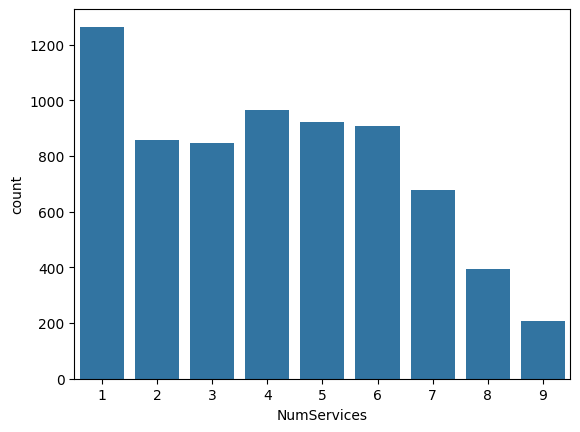

In [36]:
import seaborn as sns
sns.countplot(data=churn_data, x='NumServices')

The barchart shows the services each customer subscribes to. This is based on internet, phone, backup, streaming, and support features. Customers with low service count (0–2) show higher churn, while those with 5+ services appear more loyal.

In [37]:
#contract type binaries
churn_data['Contract_MonthToMonth'] = (churn_data['Contract'] == 'Month-to-month').astype(int)
churn_data['Contract_OneYear'] = (churn_data['Contract'] == 'One year').astype(int)
churn_data['Contract_TwoYear'] = (churn_data['Contract'] == 'Two year').astype(int)
churn_data[['Contract', 
            'Contract_MonthToMonth',
            'Contract_OneYear',
            'Contract_TwoYear']].head()

,Contract,Contract_MonthToMonth,Contract_OneYear,Contract_TwoYear
0,Month-to-month,1,0,0
1,One year,0,1,0
2,Month-to-month,1,0,0
3,One year,0,1,0
4,Month-to-month,1,0,0


In [38]:
#customers that pay automatically
churn_data['Automatic'] = churn_data['PaymentMethod'].str.contains('automatic', case=False, na=False).astype(int)
churn_data[['PaymentMethod','Automatic']].head()

,PaymentMethod,Automatic
0,Electronic check,0
1,Mailed check,0
2,Mailed check,0
3,Bank transfer (automatic),1
4,Electronic check,0


In [39]:
#paperless billing 
churn_data['PaperlessBilling_flag'] = churn_data['PaperlessBilling'].map({'Yes': 1, 'No': 0})
churn_data[['PaperlessBilling', 'PaperlessBilling_flag']].head()


,PaperlessBilling,PaperlessBilling_flag
0,Yes,1
1,No,0
2,Yes,1
3,No,0
4,Yes,1


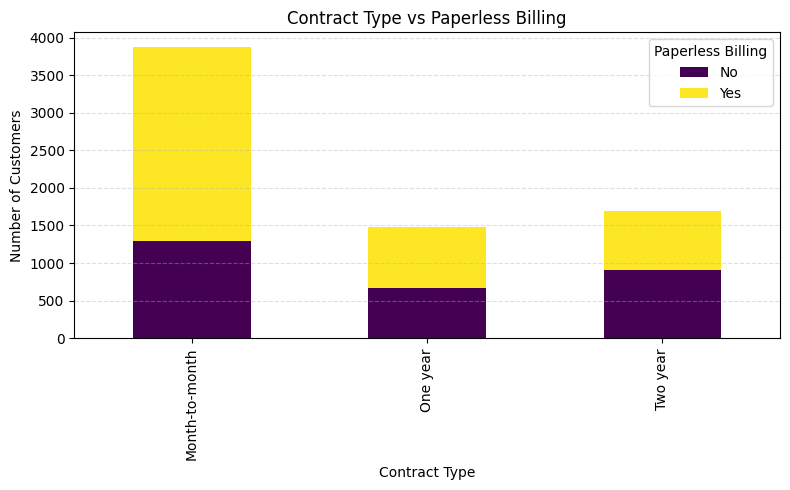

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
ct = pd.crosstab(churn_data['Contract'], churn_data['PaperlessBilling'])
ct.plot(kind='bar', stacked=True, figsize=(8,5), colormap='viridis')

plt.title("Contract Type vs Paperless Billing")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.legend(title="Paperless Billing")
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


The PaperlessBilling feature was converted into a binary flag where Yes = 1 and No = 0. Most customers with month to month contracts choose paperless billing and this is the group with the highest churn. Paperless billing is a behaviour indicator which reflects short term contract lenghts and digital behaviour.

In [ ]:
#new and long term customer
#why: new users churn the most as seen from the tenure histogram less than 6 months
#longterm customers are loyal and have very low churn more than 24 months
#improve model accuracy and interpretability

#new customer
churn_data['NewCustomer'] = (churn_data['tenure'] <= 6).astype(int)
#long term customer
churn_data['LongTermCustomer'] = (churn_data['tenure'] >= 24).astype(int)
churn_data[['tenure', 'NewCustomer', 'LongTermCustomer']].head(10)

,tenure,NewCustomer,LongTermCustomer
0,1,1,0
1,34,0,1
2,2,1,0
3,45,0,1
4,2,1,0
5,8,0,0
6,22,0,0
7,10,0,0
8,28,0,1
9,62,0,1


NewCustomer (tenure ≤ 6 months) identifies newly onboarded customers who have the highest churn rates.

LongTermCustomer (tenure ≥ 24 months) identifies long-standing customers who demonstrate high loyalty and very low churn probability.

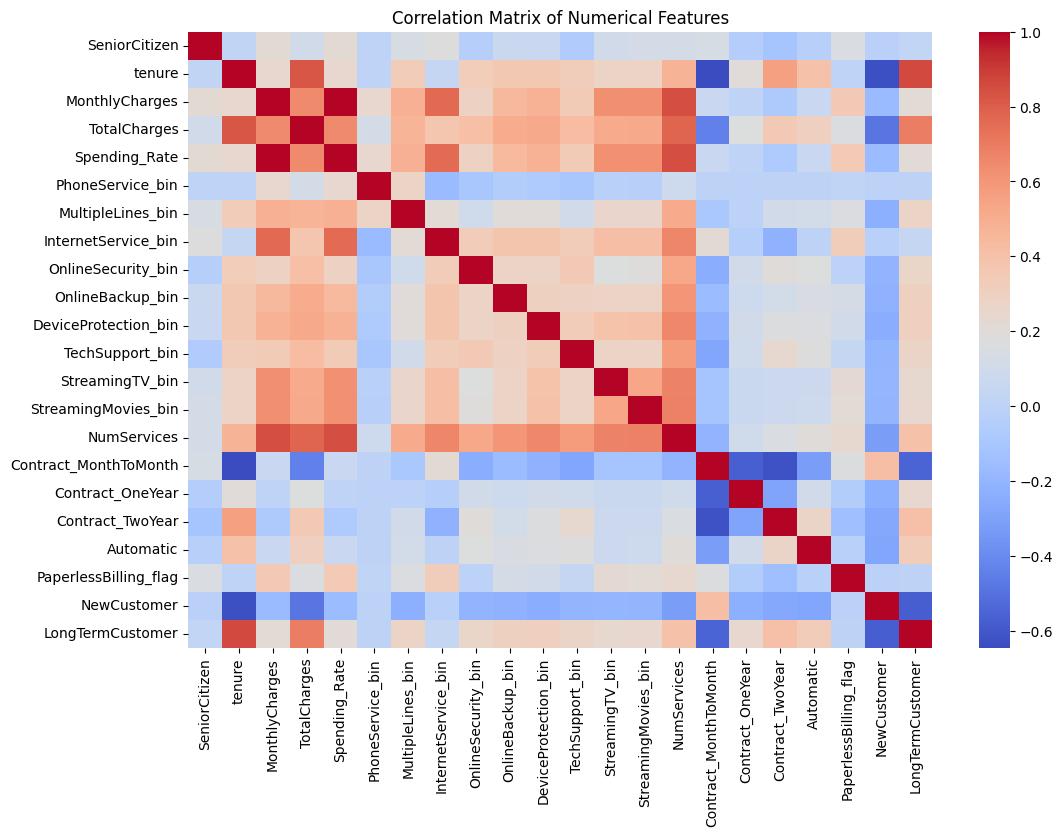

In [42]:
#correlation heatmap
numeric_df = churn_data.select_dtypes(include='number')

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

A correlation heatmap was used to evaluate the relationships between numerical features. Theres a very strong correlation between TotalCharges, tenure, and MonthlyCharges, since TotalCharges is mathematically derived from the other two variables. To prevent multicollinearity, TotalCharges will be removed from the modeling stage.

Engineered features such as NumServices, NewCustomer, and LongTermCustomer showed meaningful relationships with other variables, confirming their significance for modeling.


**Chi-Square**

In [43]:
#identifty the categorical variables
churn_categorical_cols=churn_data.select_dtypes(include=['object']).columns
print(churn_categorical_cols)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn',
       'TenureGroup'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

churn_data_encoded = churn_data[churn_categorical_cols].apply(LabelEncoder().fit_transform)


In [45]:
#run the chi square test
from sklearn.feature_selection import chi2
import pandas as pd

chi_scores, p_values = chi2(churn_data_encoded, churn_data['Churn'])

chi_square_results = pd.DataFrame({
    'Feature': churn_categorical_cols,
    'ChiSquareScore': chi_scores,
    'p-value': p_values
}).sort_values(by='ChiSquareScore', ascending=False)

chi_square_results

,Feature,ChiSquareScore,p-value
16,Churn,5174.000000,0.000000e+00
0,customerID,2516.968803,0.000000e+00
13,Contract,1115.780167,1.227941e-244
7,OnlineSecurity,551.611529,5.615882e-122
10,TechSupport,523.303866,8.086236e-116
17,TenureGroup,372.291140,5.933978e-83
8,OnlineBackup,230.086520,5.707869e-52
9,DeviceProtection,191.303140,1.651539e-43
3,Dependents,133.036443,8.876729e-31
14,PaperlessBilling,105.680863,8.661987e-25


chi-square interpretation. The strongest predictors are contract, online security,tech support,tenure group and Paperless Billing.

In [46]:
#drop variables with srong multicollinearity,very low chi squares and high p-values
cols_drop=[
    'customerID',
    'TotalCharges',
    'gender',
    'PhoneService'
]
churn_data = churn_data.drop(columns=cols_drop)
churn_data.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn',
       'Spending_Rate', 'TenureGroup', 'PhoneService_bin', 'MultipleLines_bin',
       'InternetService_bin', 'OnlineSecurity_bin', 'OnlineBackup_bin',
       'DeviceProtection_bin', 'TechSupport_bin', 'StreamingTV_bin',
       'StreamingMovies_bin', 'NumServices', 'Contract_MonthToMonth',
       'Contract_OneYear', 'Contract_TwoYear', 'Automatic',
       'PaperlessBilling_flag', 'NewCustomer', 'LongTermCustomer'],
      dtype='object')

VIF-Variance Inflation Factor 
Spending rate and autopay  had a very high multicollinearity and the column was dropped.

In [47]:
# check for missing values in all variables including the engineered feature
import numpy as np
num_df = churn_data.select_dtypes(include='number').drop(columns=['Churn'], errors='ignore')
num_df
print(num_df.isna().sum())

SeniorCitizen             0
tenure                    0
MonthlyCharges            0
Spending_Rate            11
PhoneService_bin          0
MultipleLines_bin         0
InternetService_bin       0
OnlineSecurity_bin        0
OnlineBackup_bin          0
DeviceProtection_bin      0
TechSupport_bin           0
StreamingTV_bin           0
StreamingMovies_bin       0
NumServices               0
Contract_MonthToMonth     0
Contract_OneYear          0
Contract_TwoYear          0
Automatic                 0
PaperlessBilling_flag     0
NewCustomer               0
LongTermCustomer          0
dtype: int64


In [48]:
churn_data['Spending_Rate'] = churn_data['Spending_Rate'].fillna(churn_data['Spending_Rate'].median())
churn_data['Spending_Rate'].isna().sum()

np.int64(0)

In [49]:
churn_data = churn_data.drop(columns=['Contract_TwoYear'], errors='ignore')
bin_columns = [c for c in churn_data.columns if c.endswith('_bin')]
churn_data = churn_data.drop(columns=bin_columns, errors='ignore')
churn_X = churn_data.select_dtypes(include='number').drop(columns=['Churn'], errors='ignore').copy()
churn_data = churn_data.drop(columns=['Automatic'], errors='ignore')
churn_data = churn_data.drop(columns=['Spending_Rate'], errors='ignore')

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = churn_data.select_dtypes(include='number')
# Compute VIF
vif_churn = pd.DataFrame()
vif_churn['Feature'] = X.columns
vif_churn['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_churn.sort_values('VIF',ascending=False).round(2)

,Feature,VIF
2,MonthlyCharges,28.76
3,NumServices,22.64
1,tenure,11.97
8,LongTermCustomer,9.11
4,Contract_MonthToMonth,3.96
6,PaperlessBilling_flag,2.89
7,NewCustomer,1.70
5,Contract_OneYear,1.59
0,SeniorCitizen,1.29


*Encoding*

In [51]:
#copy incase of errors or want to revert
churn_backup=churn_data.copy()

In [52]:
#churn is 0/1
if churn_data['Churn'].dtype == 'O' or churn_data['Churn'].isin(['Yes','No']).all():
    churn_data['Churn'] = churn_data['Churn'].map({'Yes':1, 'No':0})
from sklearn.preprocessing import LabelEncoder
churn_data['Churn'] = LabelEncoder().fit_transform(churn_data['Churn'])
print(churn_data['Churn'].value_counts())   
 

Churn
0    5174
1    1869
Name: count, dtype: int64


In [53]:
#list remaining columns and their unique counts
cat_cols = churn_data.select_dtypes(include=['object','category']).columns.tolist()
if len(cat_cols) == 0:
    print("No remaining object/category columns —(all numeric).")
else:
    print("Categorical columns remaining (object/category):")
    for c in cat_cols:
        print(f" - {c}: {churn_data[c].nunique()} unique values")

Categorical columns remaining (object/category):
 - Partner: 2 unique values
 - Dependents: 2 unique values
 - MultipleLines: 3 unique values
 - InternetService: 3 unique values
 - OnlineSecurity: 3 unique values
 - OnlineBackup: 3 unique values
 - DeviceProtection: 3 unique values
 - TechSupport: 3 unique values
 - StreamingTV: 3 unique values
 - StreamingMovies: 3 unique values
 - Contract: 3 unique values
 - PaperlessBilling: 2 unique values
 - PaymentMethod: 4 unique values
 - TenureGroup: 6 unique values


In [57]:
#binary columns for dependents, partner and paperless billing
binary_map = {'Yes':1, 'No':0, 'yes':1, 'no':0}
for col in ['Partner', 'Dependents', 'PaperlessBilling']:
    if col in churn_data.columns:
          churn_data[col] = churn_data[col].map(binary_map).fillna(churn_data[col])
#identify remaining categorical columns to one hot code
remaining_cat = churn_data.select_dtypes(include=['object','category']).columns.tolist()
print(remaining_cat)
#one-hot encode  remaining categorical columns
churn_encoded = pd.get_dummies(churn_data, columns=remaining_cat, drop_first=True)
print("\nShape before encoding:", churn_data.shape)
print("Shape after encoding :", churn_encoded.shape)
print("\nSample columns (first 30):\n", churn_encoded.columns[:30].tolist())
#prepare x and y for modelling
churn_X = churn_encoded.drop(columns=['Churn'], errors='ignore')
churn_y = churn_encoded['Churn']

print("\nX shape:", churn_X.shape)
print("\ny shape:", churn_y.shape)
display(churn_encoded.head())


['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'TenureGroup']

Shape before encoding: (7043, 24)
Shape after encoding : (7043, 39)

Sample columns (first 30):
 ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling', 'MonthlyCharges', 'Churn', 'NumServices', 'Contract_MonthToMonth', 'Contract_OneYear', 'PaperlessBilling_flag', 'NewCustomer', 'LongTermCustomer', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year']

X shape: (7043, 38

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,Churn,NumServices,Contract_MonthToMonth,Contract_OneYear,...,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_13-24,TenureGroup_25-48,TenureGroup_4-6,TenureGroup_49-72,TenureGroup_7-12
0,0,1.0,0.0,1,1.0,29.85,0,2,1,0,...,False,False,False,True,False,False,False,False,False,False
1,0,0.0,0.0,34,0.0,56.95,0,4,0,1,...,True,False,False,False,True,False,True,False,False,False
2,0,0.0,0.0,2,1.0,53.85,1,4,1,0,...,False,False,False,False,True,False,False,False,False,False
3,0,0.0,0.0,45,0.0,42.30,0,4,0,1,...,True,False,False,False,False,False,True,False,False,False
4,0,0.0,0.0,2,1.0,70.70,1,2,1,0,...,False,False,False,True,False,False,False,False,False,False


**Train-test split**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    churn_X,
    churn_y,
    test_size=0.20,
    random_state=42,
    stratify=churn_y      
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


print("\nChurn rate (1 = churn):")
print("Overall:", round(churn_y.mean(), 3))
print("Train:  ", round(y_train.mean(), 3))
print("Test:   ", round(y_test.mean(), 3))


X_train shape: (5634, 38)
X_test shape: (1409, 38)
y_train shape: (5634,)
y_test shape: (1409,)

Churn rate (1 = churn):
Overall: 0.265
Train:   0.265
Test:    0.265


**Logistic regression**


Accuracy: 0.8055358410220014

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

ROC-AUC: 0.8463509778087783

Confusion Matrix:
 [[940  95]
 [179 195]]


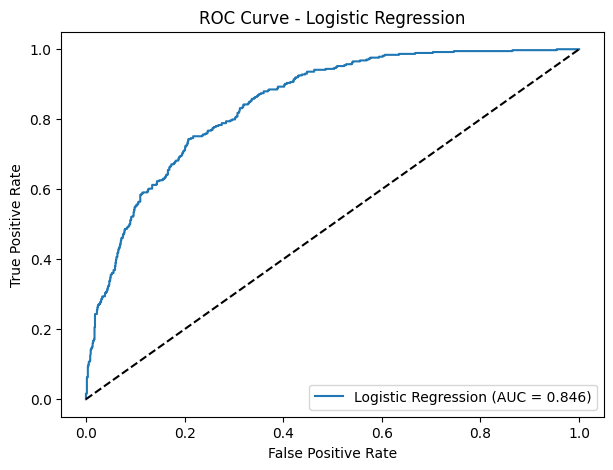

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

#Create logistic regression model
log_model = LogisticRegression(max_iter=2000)
#Train the model
log_model.fit(X_train, y_train)
#Make predictions
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:,1]
#Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

#Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.3f})".format(roc_auc_score(y_test, y_prob)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


The model can correctly predict customer churn 80.5% of the time. the ROC-AUC is 0.846 which mean it does an excellent job separating the churners from non-churners.
941 (TN) - correctly predicted “No Churn”
94 (FP) - predicted churn but the customer stayed
180 (FN) - predicted “No churn” but customer actually churned 
194 (TP) - correctly predicted churn

**Precision, Recall, F1-score**
The model correctly identifies non-churners with high recall (91%), but performs moderately on detecting churners (recall = 52%), and misses churners 48% of the time.

Although logistic regression provides a solid baseline, it misses some churners (false negatives). Therefore, a more advanced model such as Random Forest is recommended to improve churn detection.

**Random forest classifier**



Accuracy: 0.772888573456352

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1035
           1       0.59      0.46      0.52       374

    accuracy                           0.77      1409
   macro avg       0.71      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409

ROC-AUC: 0.8191260430390864

Confusion Matrix:
 [[917 118]
 [202 172]]


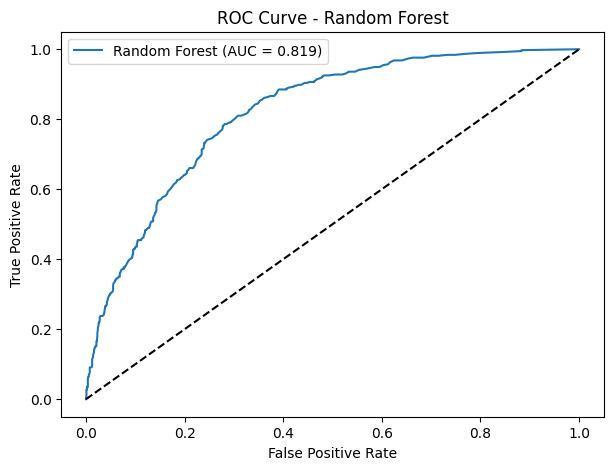


Top 10 Most Important Features:

                           Feature  Importance
5                   MonthlyCharges    0.187680
3                           tenure    0.148260
7            Contract_MonthToMonth    0.073076
6                      NumServices    0.047150
29               Contract_Two year    0.040727
14     InternetService_Fiber optic    0.039759
31  PaymentMethod_Electronic check    0.035682
1                          Partner    0.027047
11                LongTermCustomer    0.026424
17              OnlineSecurity_Yes    0.022597


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
churn_rf_model = RandomForestClassifier(
    n_estimators=300,    # number of trees in the forest
    random_state=42,     # ensures reproducible results
    class_weight='balanced',  # helps improve recall for churners
    max_depth=None 
)
churn_rf_model.fit(X_train, y_train)
y_pred_rf = churn_rf_model.predict(X_test)
y_prob_rf = churn_rf_model.predict_proba(X_test)[:, 1]
print("\nAccuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:\n", cm_rf)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label="Random Forest (AUC = {:.3f})".format(roc_auc_score(y_test, y_prob_rf)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()
import pandas as pd
fi = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': churn_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Most Important Features:\n")
print(fi.head(10))

The Random forest model correctly predicted churn/no churn 77% of the time. Although the model performed reasonably well, its ability to identify customers who are actually likely to churn was limited. 54% of the customers that left the model missed them. 

The confusion matrix shows that the model correctly identified 172 of all churners and misclassified 202 churners as non-churners. 917 non-churners were correctly identified and 118 non-churners were incorrectly flagged as churn risk.

The model’s ROC-AUC score of 0.819 indicates fairly good discrimination between churners and non-churners. While the score shows that the model can separate the two groups better than chance, there is still room for improvement, especially in detecting churners more consistently.

**Model evaluation** 
Logistic Regression


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.81
Precision: 0.67
Recall: 0.52
F1 Score: 0.59


The model achieved an accuracy of 81%  which means it was able to correctly achieve churn and not-churn accurately. The precision score is 0.67, indicating that when the model predicts a customer will churn, it is correct about 67% of the time. The model does not frequently flag loyal customers as churn risks.
The recall score is 0.52 which means that the model is able to identify 52% of all churners.

Random forest eveluation

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label=1)
recall_rf = recall_score(y_test, y_pred_rf, pos_label=1)
f1_rf = f1_score(y_test, y_pred_rf, pos_label=1)

print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision : {precision_rf:.2f}")
print(f"Recall : {recall_rf:.2f}")
print(f"F1 Score : {f1_rf:.2f}")


Accuracy: 0.77
Precision : 0.59
Recall : 0.46
F1 Score : 0.52


Explanation
The random forest model acheved an accuracy of 77% which means it was able to classify most customers as churn or not churn. While the model's accuracy is 77% it performed weaker when it comes to identifying customers who actually churn. This is evident in the recall score of 0.46. More than half of the customers that left were not detected by the model.

The model is able to predict churn 59% of the time (precision score of 0.59) . The f1 score is 0.52  which confirms that the model struggles to consistently identify churners.
